In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set({
    'axes.facecolor': '#EAEAF2',
    'axes.edgecolor': '2f2f2f',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': '.15',
    'figure.facecolor': 'white',
    'grid.color': '#3f3f3f',
    'grid.linestyle': '-',
    'text.color': 'black',
    'xtick.color': '2f2f2f',
    'ytick.color': '2f2f2f',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    #'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
    #'patch.edgecolor': 'black',
    'patch.force_edgecolor': False,
    
    'xtick.bottom': False,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
})

axes_ml_data = pd.read_csv("Axes Classification Results timepoints and channels AUROC tuning.csv")
axes_dl_data = pd.read_csv(r"D:\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\Notebooks\Deep Learning Systematic for Paper\Best Loss Model Axes Accuracies.csv")

axes_ml_data.head()

,Unnamed: 0,Accuracy,Classifier,Feature Set
0,0,0.434066,SVC,48-72h_bf
1,1,0.565934,SVC,48-72h_bf
2,2,0.500000,SVC,48-72h_bf
3,3,0.423077,SVC,48-72h_bf
4,4,0.519231,SVC,48-72h_bf


In [2]:
axes_dl_reformed = axes_dl_data[axes_dl_data["Tag"] == "Balanced_Accuracy/unseen"].rename(columns = {"Model":"Classifier","Value":"Accuracy","Input":"Feature Set"})
axes_dl_reformed

,Unnamed: 0,Step,Tag,Accuracy,LR,BS,Epochs,CV,Hour,Channel,Training_Type,Feature Set,Classifier
1,1,6,Balanced_Accuracy/unseen,0.500000,0.00010,16,100,6,48-72h,bf,best_loss,48-72h_bf,CustomNet_BL_Axes
3,3,2,Balanced_Accuracy/unseen,0.500000,0.00010,16,200,2,48-72h,bf,best_loss,48-72h_bf,CustomNet_BL_Axes
5,5,3,Balanced_Accuracy/unseen,0.500000,0.00010,32,100,3,48-72h,bf,best_loss,48-72h_bf,CustomNet_BL_Axes
7,7,4,Balanced_Accuracy/unseen,0.500000,0.00010,32,200,4,48-72h,bf,best_loss,48-72h_bf,CustomNet_BL_Axes
9,9,9,Balanced_Accuracy/unseen,0.538462,0.00010,32,200,9,48-72h,bf,best_loss,48-72h_bf,CustomNet_BL_Axes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,8,Balanced_Accuracy/unseen,0.692308,0.00100,32,200,8,alltp,bra,best_loss,alltp_bra,Resnet18_BL_Axes_FC
533,533,1,Balanced_Accuracy/unseen,0.510989,0.00100,32,50,1,alltp,bra,best_loss,alltp_bra,Resnet18_BL_Axes_FC
535,535,4,Balanced_Accuracy/unseen,0.567143,0.00100,8,200,4,alltp,bra,best_loss,alltp_bra,Resnet18_BL_Axes_FC
537,537,3,Balanced_Accuracy/unseen,0.642857,0.00001,16,50,3,alltp,bra,best_loss,alltp_bra,Resnet18_BL_Axes_FC


In [3]:
columns = ["Accuracy","Classifier","Feature Set"]
all_axis_data = pd.concat([axes_ml_data[columns],axes_dl_reformed[columns]],axis=0,ignore_index=True)
all_axis_data

,Accuracy,Classifier,Feature Set
0,0.434066,SVC,48-72h_bf
1,0.565934,SVC,48-72h_bf
2,0.500000,SVC,48-72h_bf
3,0.423077,SVC,48-72h_bf
4,0.519231,SVC,48-72h_bf
...,...,...,...
625,0.692308,Resnet18_BL_Axes_FC,alltp_bra
626,0.510989,Resnet18_BL_Axes_FC,alltp_bra
627,0.567143,Resnet18_BL_Axes_FC,alltp_bra
628,0.642857,Resnet18_BL_Axes_FC,alltp_bra


In [4]:
palette = sns.color_palette([sns.color_palette("flare")[0],sns.color_palette("flare")[2],sns.color_palette("flare")[1],sns.color_palette("flare")[4],sns.color_palette("crest")[0],sns.color_palette("crest")[2],sns.color_palette("crest")[4]])
palette

[(0.9155979, 0.55210684, 0.42070204),
 (0.81942908, 0.28911553, 0.38102921),
 (0.888292, 0.40830288, 0.36223756),
 (0.56041794, 0.19845221, 0.44207535),
 (0.48942421, 0.72854938, 0.56751036),
 (0.24929311, 0.56486397, 0.5586654),
 (0.11131735, 0.39155635, 0.53422678)]

In [5]:
all_axis_data["Classifier"].unique()

array(['SVC', 'RF', 'LDA', 'XG Boost', 'CustomNet_BL_Axes',
       'Resnet18_BL_Axes', 'Resnet18_BL_Axes_FC'], dtype=object)

findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following familie

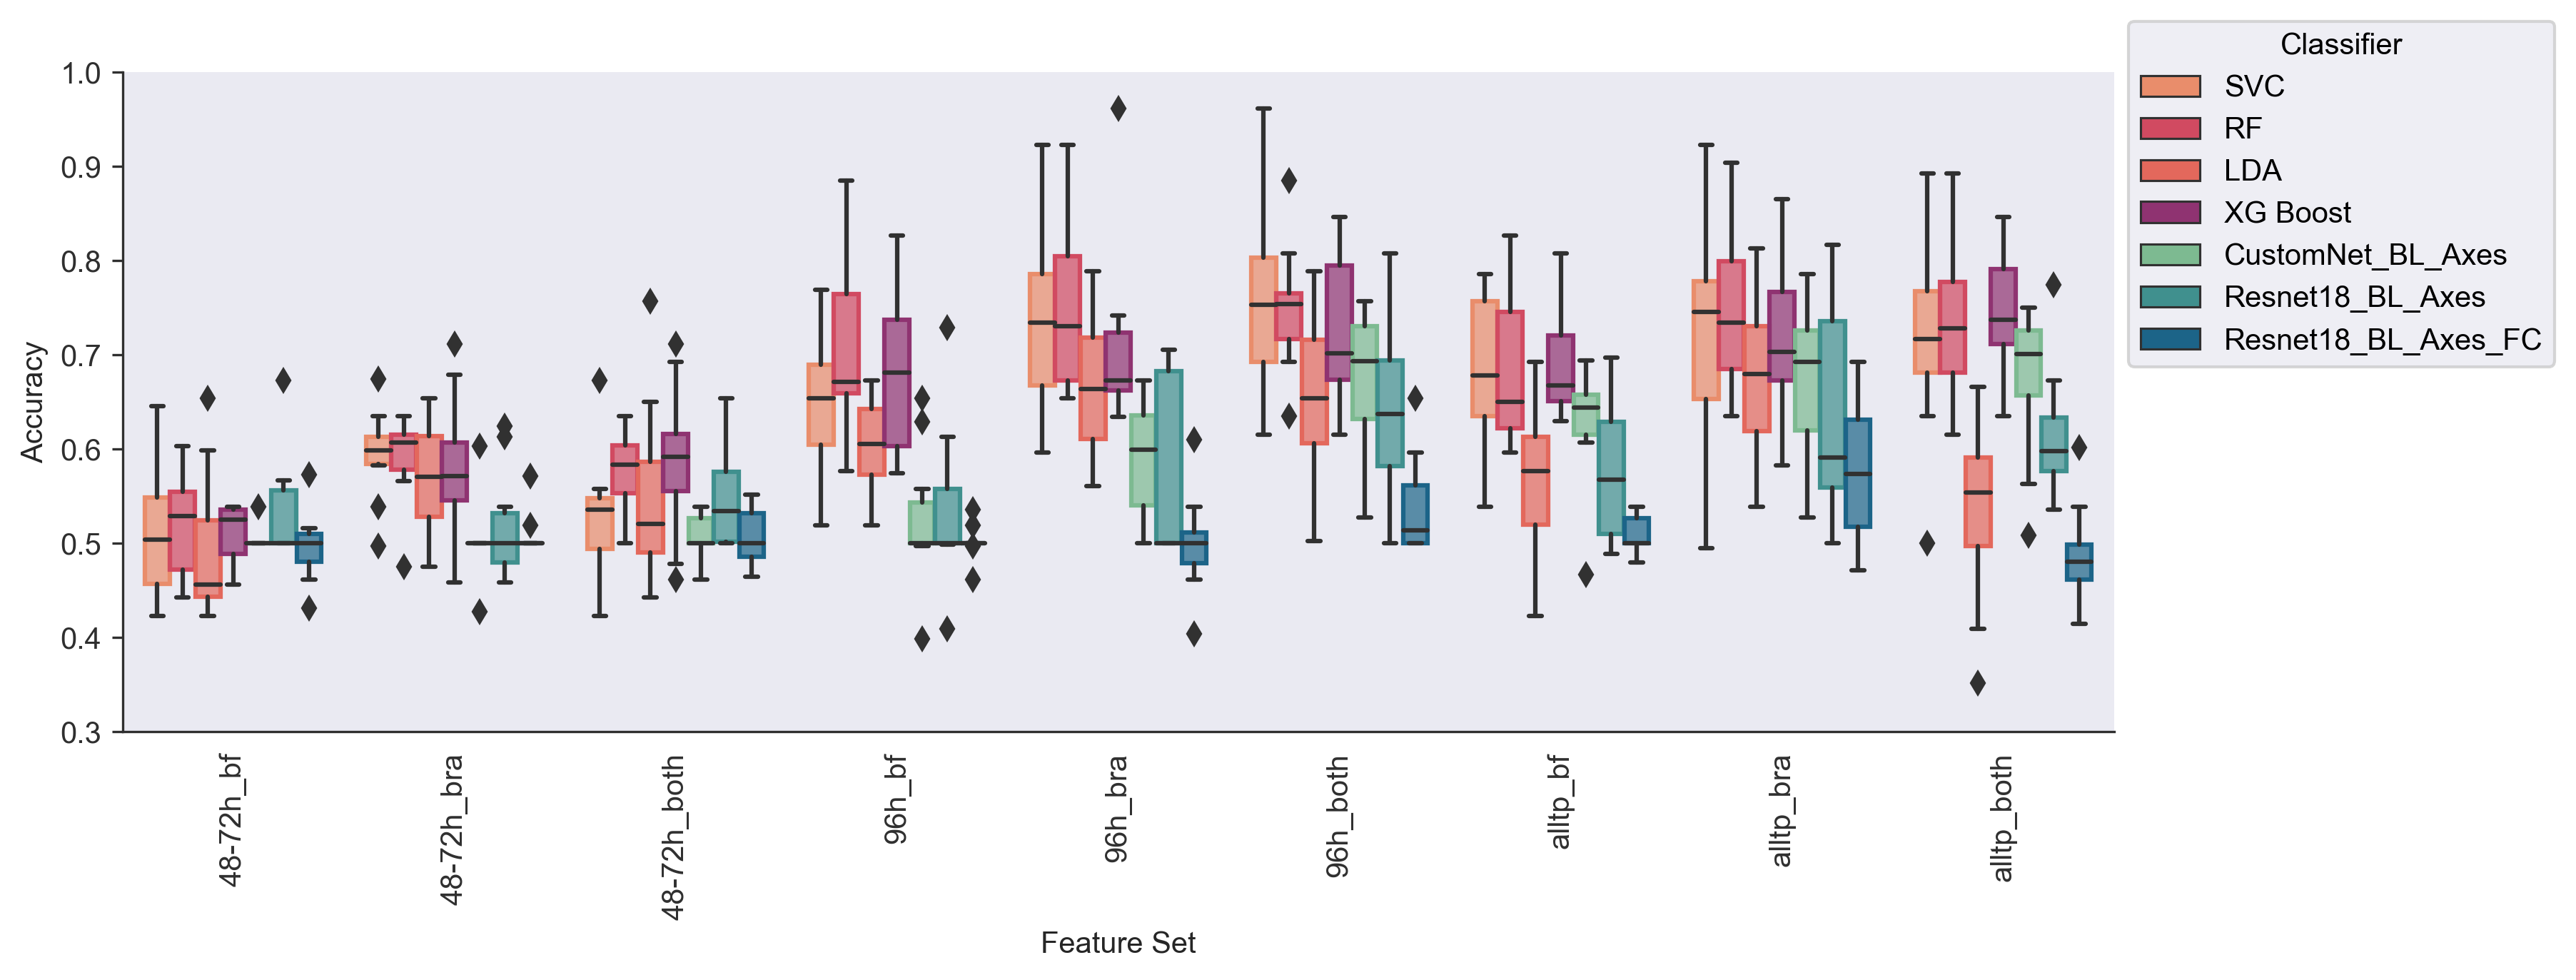

In [6]:
import matplotlib as mpl
out_revisions = r"D:\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\Plots\Revisions"
plt.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['figure.dpi'] = 300


sns.set_style({
    'axes.facecolor': '#EAEAF2',
    'axes.edgecolor': '2f2f2f',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': '.15',
    'figure.facecolor': 'white',
    'grid.color': '#3f3f3f',
    'grid.linestyle': '-',
    'text.color': 'black',
    'xtick.color': '2f2f2f',
    'ytick.color': '2f2f2f',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    #'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
    #'patch.edgecolor': 'black',
    'patch.force_edgecolor': False,
    
    'xtick.bottom': False,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
})

fig, ax = plt.subplots(1,1,figsize=(12,4))
hue_order=all_axis_data["Classifier"].unique()

order = all_axis_data["Feature Set"].unique()

sns.boxplot(
    all_axis_data,
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=order,
    hue_order=hue_order, 
    ax = ax, 
    dodge=True,
    saturation=1,
    palette = palette,
)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.3,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/axis classification total comparison.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

In [7]:
all_axis_data["Feature Set"].unique()

array(['48-72h_bf', '48-72h_bra', '48-72h_both', '96h_bf', '96h_bra',
       '96h_both', 'alltp_bf', 'alltp_bra', 'alltp_both'], dtype=object)

In [8]:
models_for_paper = [
    'SVC', 
    'XG Boost',
    'CustomNet_BL_Axes',
]

features_channels = [
    'alltp_bf', 
    'alltp_bra', 
    'alltp_both'
]

features_timepoints = [
    '48-72h_both',
    '96h_both', 
    'alltp_both'
]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

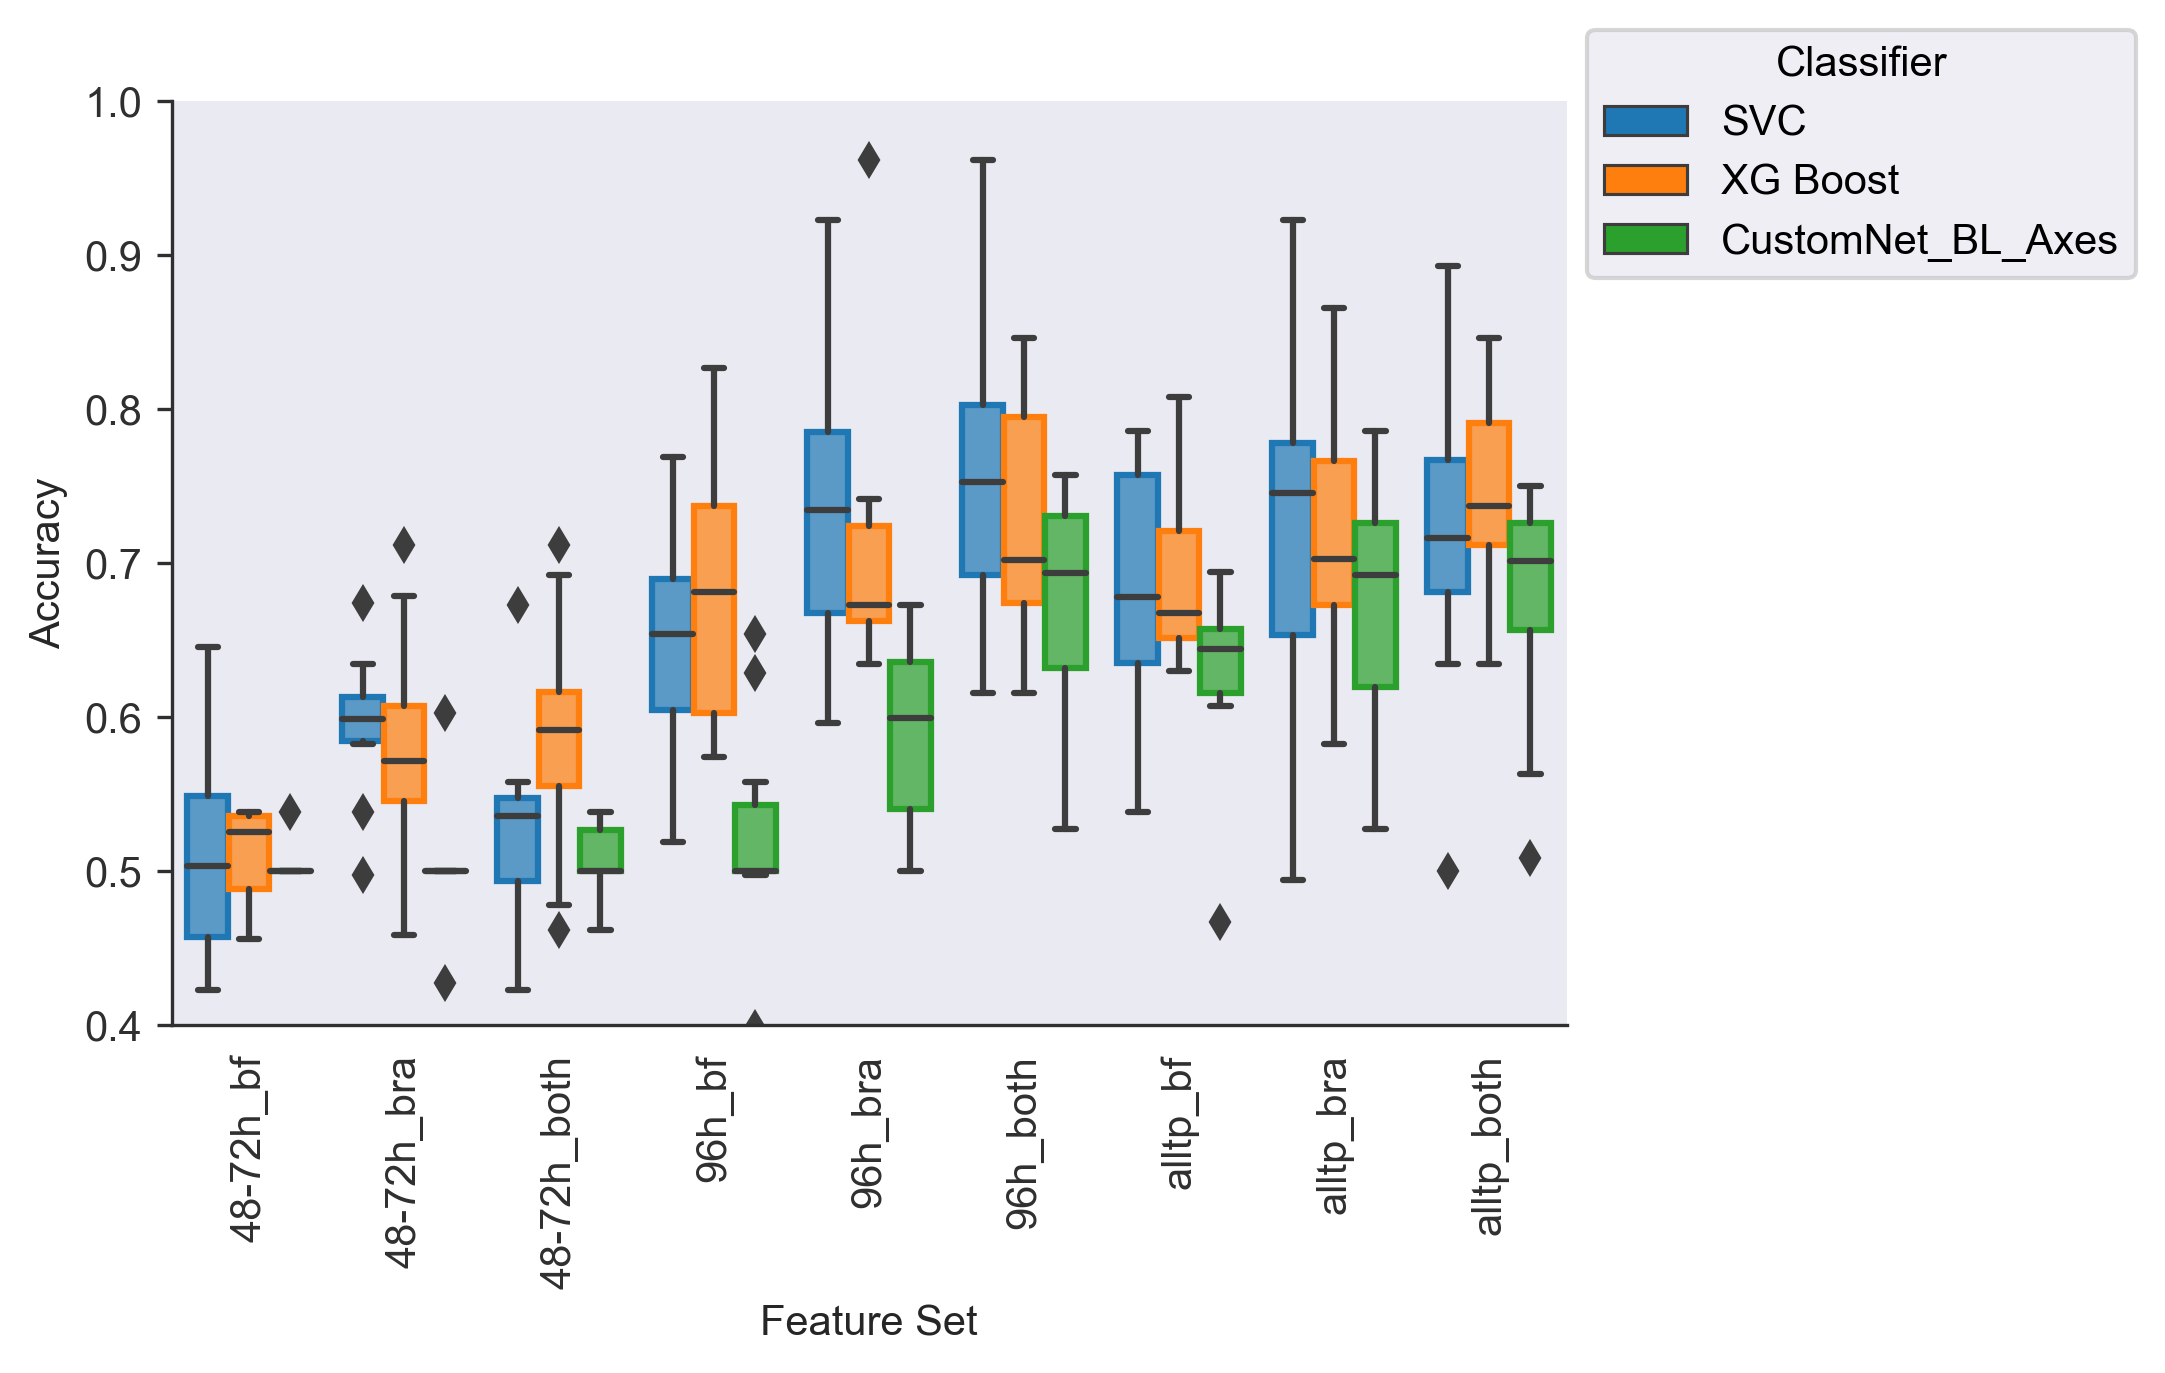

In [9]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(1,1,figsize=(6,4))
hue_order=models_for_paper
order = all_axis_data["Feature Set"].unique()

sns.boxplot(
    all_axis_data[[model in models_for_paper for model in all_axis_data["Classifier"]]],
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=order,
    hue_order=hue_order, 
    ax = ax, dodge=True,
    saturation=1,
    palette = "tab10"
) #**{"alpha":0.6,"linewidth":1}
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.4,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/axis classification comparison paper models all feature sets.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

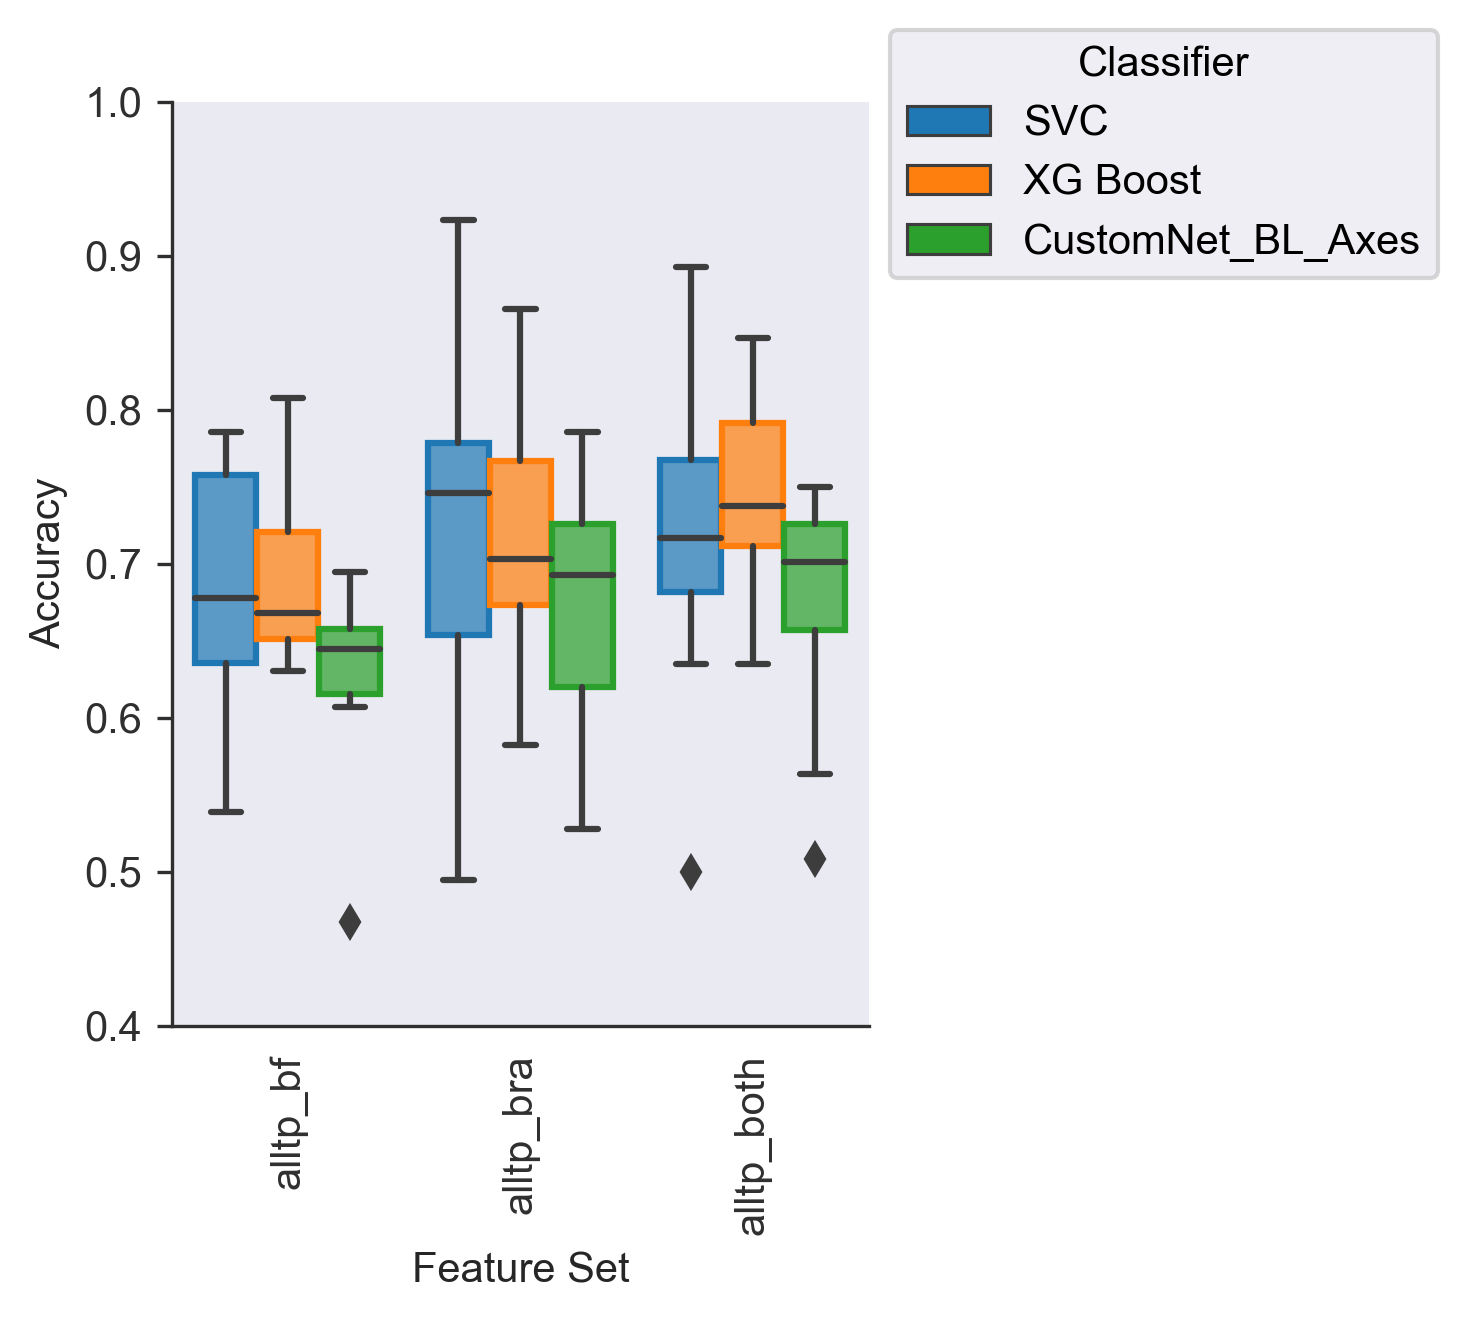

In [10]:
fig, ax = plt.subplots(1,1,figsize=(3,4))
hue_order=all_axis_data["Classifier"].unique()
order = all_axis_data["Feature Set"].unique()

sns.boxplot(
    all_axis_data[
        [feature in features_channels and model in models_for_paper for feature,model in all_axis_data[["Feature Set","Classifier"]].to_numpy()]
    ],
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=features_channels,
    hue_order=models_for_paper, 
    ax = ax, dodge=True,
    palette="tab10",
    saturation=1,
)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.4,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/axis classification comparison paper models channels.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

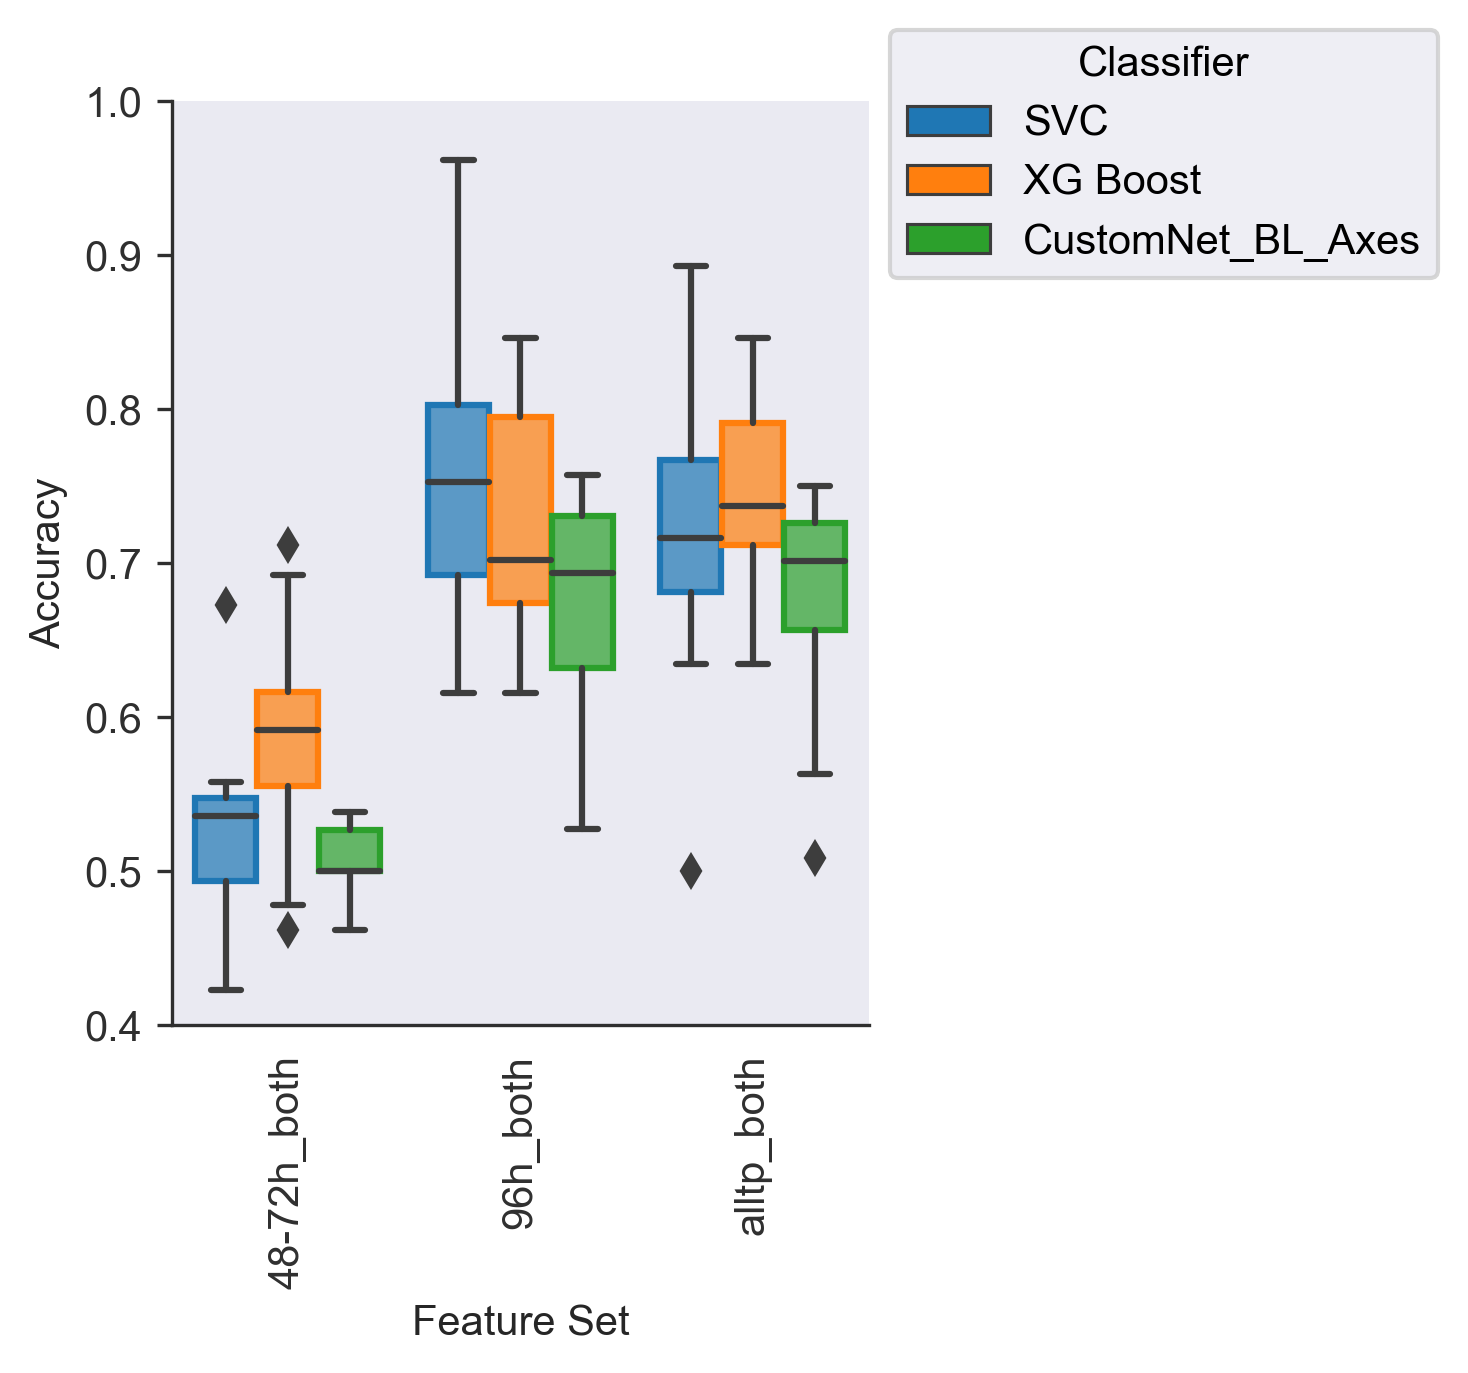

In [11]:
fig, ax = plt.subplots(1,1,figsize=(3,4))
hue_order=all_axis_data["Classifier"].unique()
order = all_axis_data["Feature Set"].unique()

sns.boxplot(
    all_axis_data[
        [feature in features_timepoints and model in models_for_paper for feature,model in all_axis_data[["Feature Set","Classifier"]].to_numpy()]
    ],
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=features_timepoints,
    hue_order=models_for_paper, 
    ax = ax, dodge=True,
    saturation=1,
    palette="tab10"
)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.4,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/axis classification comparison paper models timepoints.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

In [12]:
morph_ml_data = pd.read_csv("Morph Classification Results timepoints and channels AUROC tuning.csv")
morph_dl_data = pd.read_csv(r"D:\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\Notebooks\Deep Learning Systematic for Paper\Best Loss Model Morph Accuracies.csv")
morph_dl_reformed = morph_dl_data[morph_dl_data["Tag"] == "Balanced_Accuracy/unseen"].rename(columns = {"Model":"Classifier","Value":"Accuracy","Input":"Feature Set"})

In [13]:
columns = ["Accuracy","Classifier","Feature Set"]
all_morph_data = pd.concat([morph_ml_data[columns],morph_dl_reformed[columns]],axis=0,ignore_index=True)
all_morph_data

,Accuracy,Classifier,Feature Set
0,0.627530,SVC,48-72h_bf
1,0.532051,SVC,48-72h_bf
2,0.538462,SVC,48-72h_bf
3,0.636752,SVC,48-72h_bf
4,0.510684,SVC,48-72h_bf
...,...,...,...
625,0.500000,Resnet18_BL_FC,alltp_bra
626,0.495726,Resnet18_BL_FC,alltp_bra
627,0.506410,Resnet18_BL_FC,alltp_bra
628,0.510684,Resnet18_BL_FC,alltp_bra


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

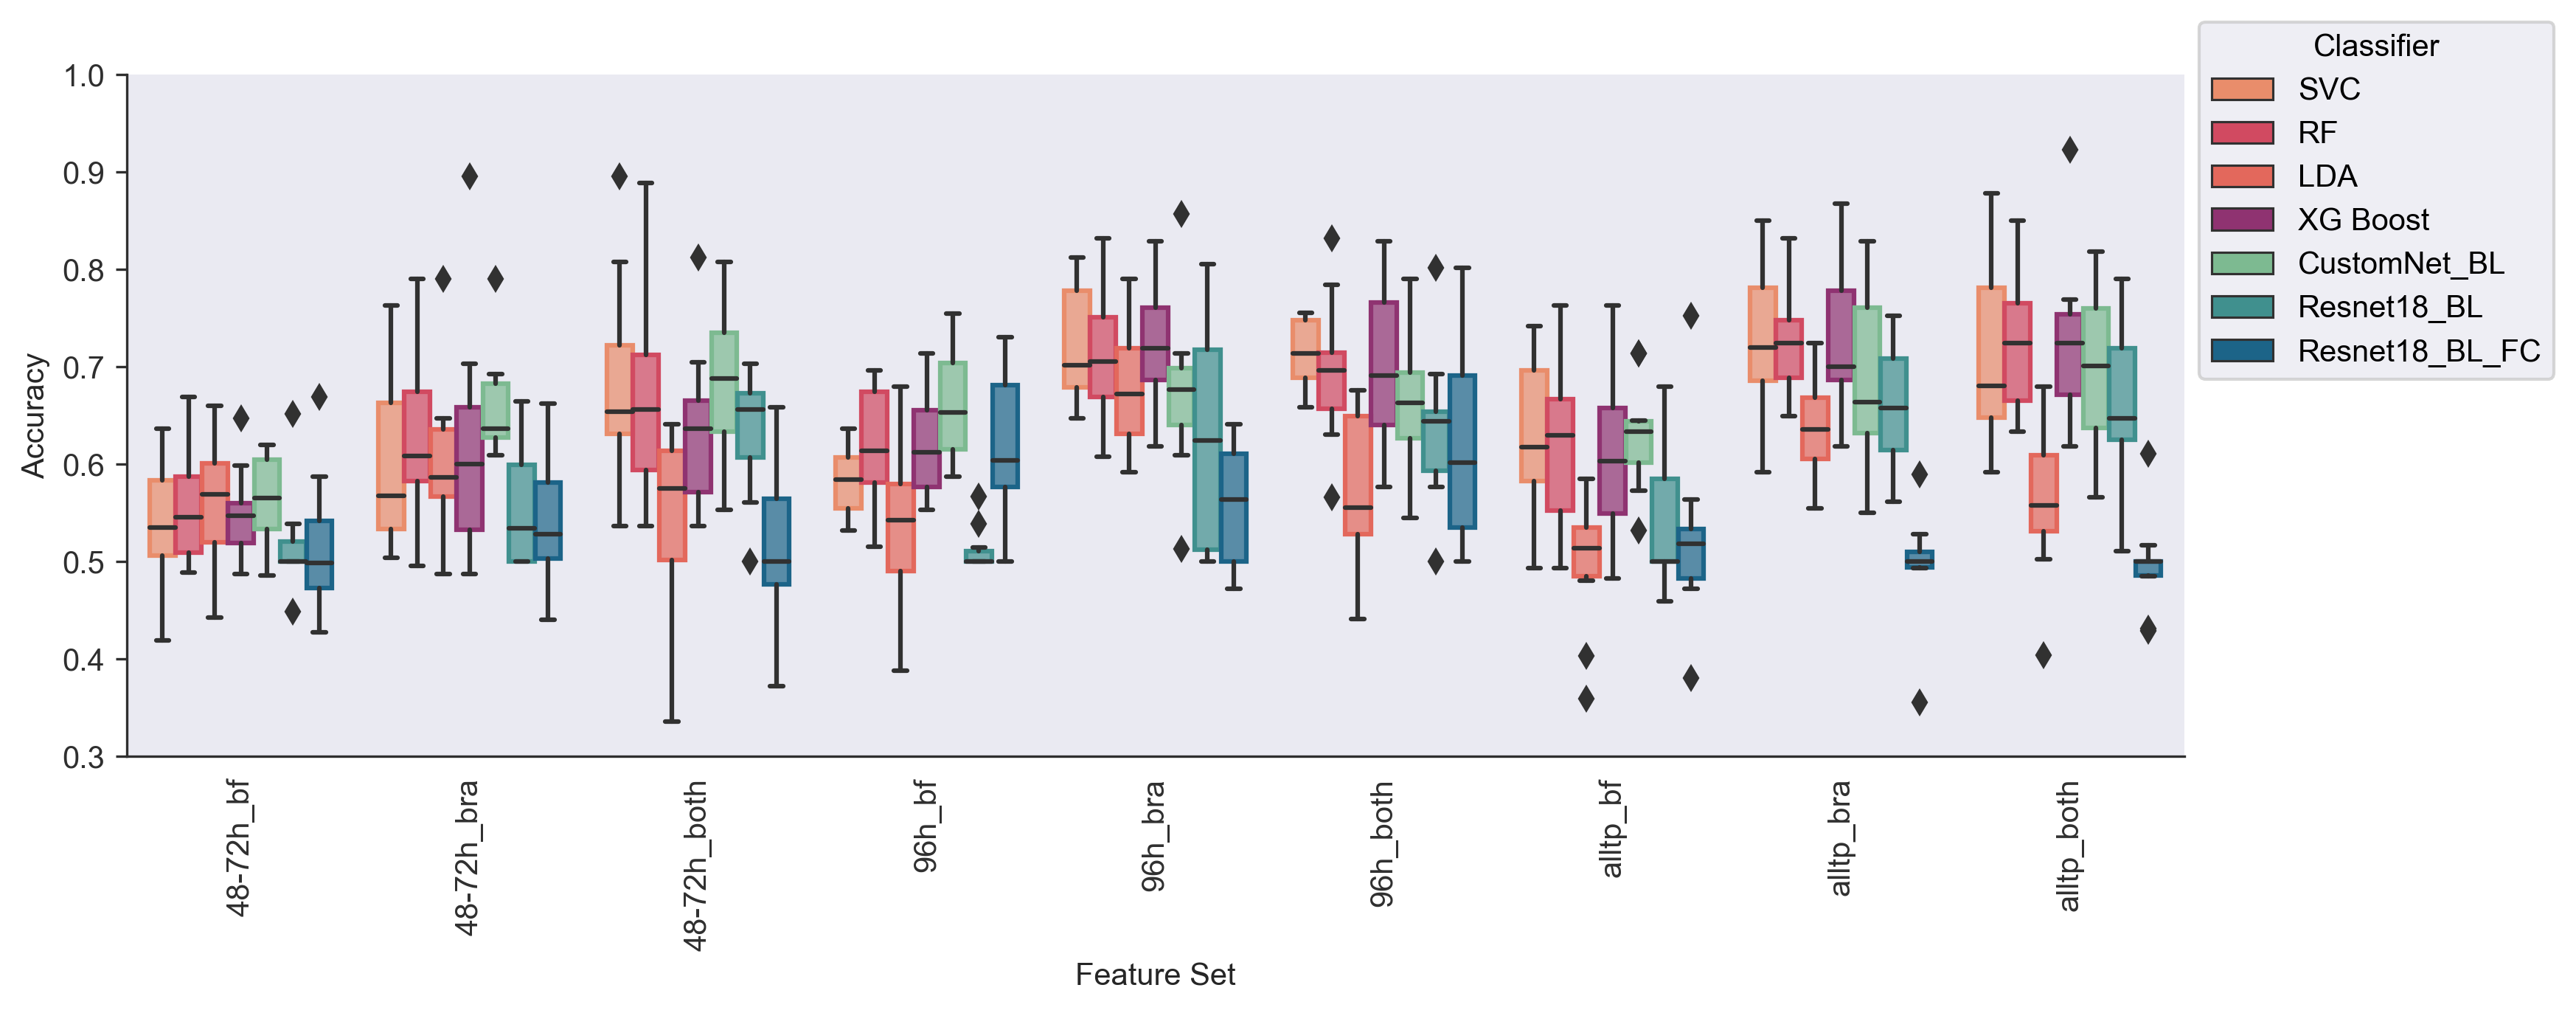

In [14]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(1,1,figsize=(12,4))
hue_order=all_morph_data["Classifier"].unique()
order = all_morph_data["Feature Set"].unique()

sns.boxplot(all_morph_data,y="Accuracy",x="Feature Set",hue="Classifier",order=order,hue_order=hue_order, ax = ax, dodge=True,saturation=1,palette = palette) #**{"alpha":0.6,"linewidth":1}
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.3,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/morph classification total comparison.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

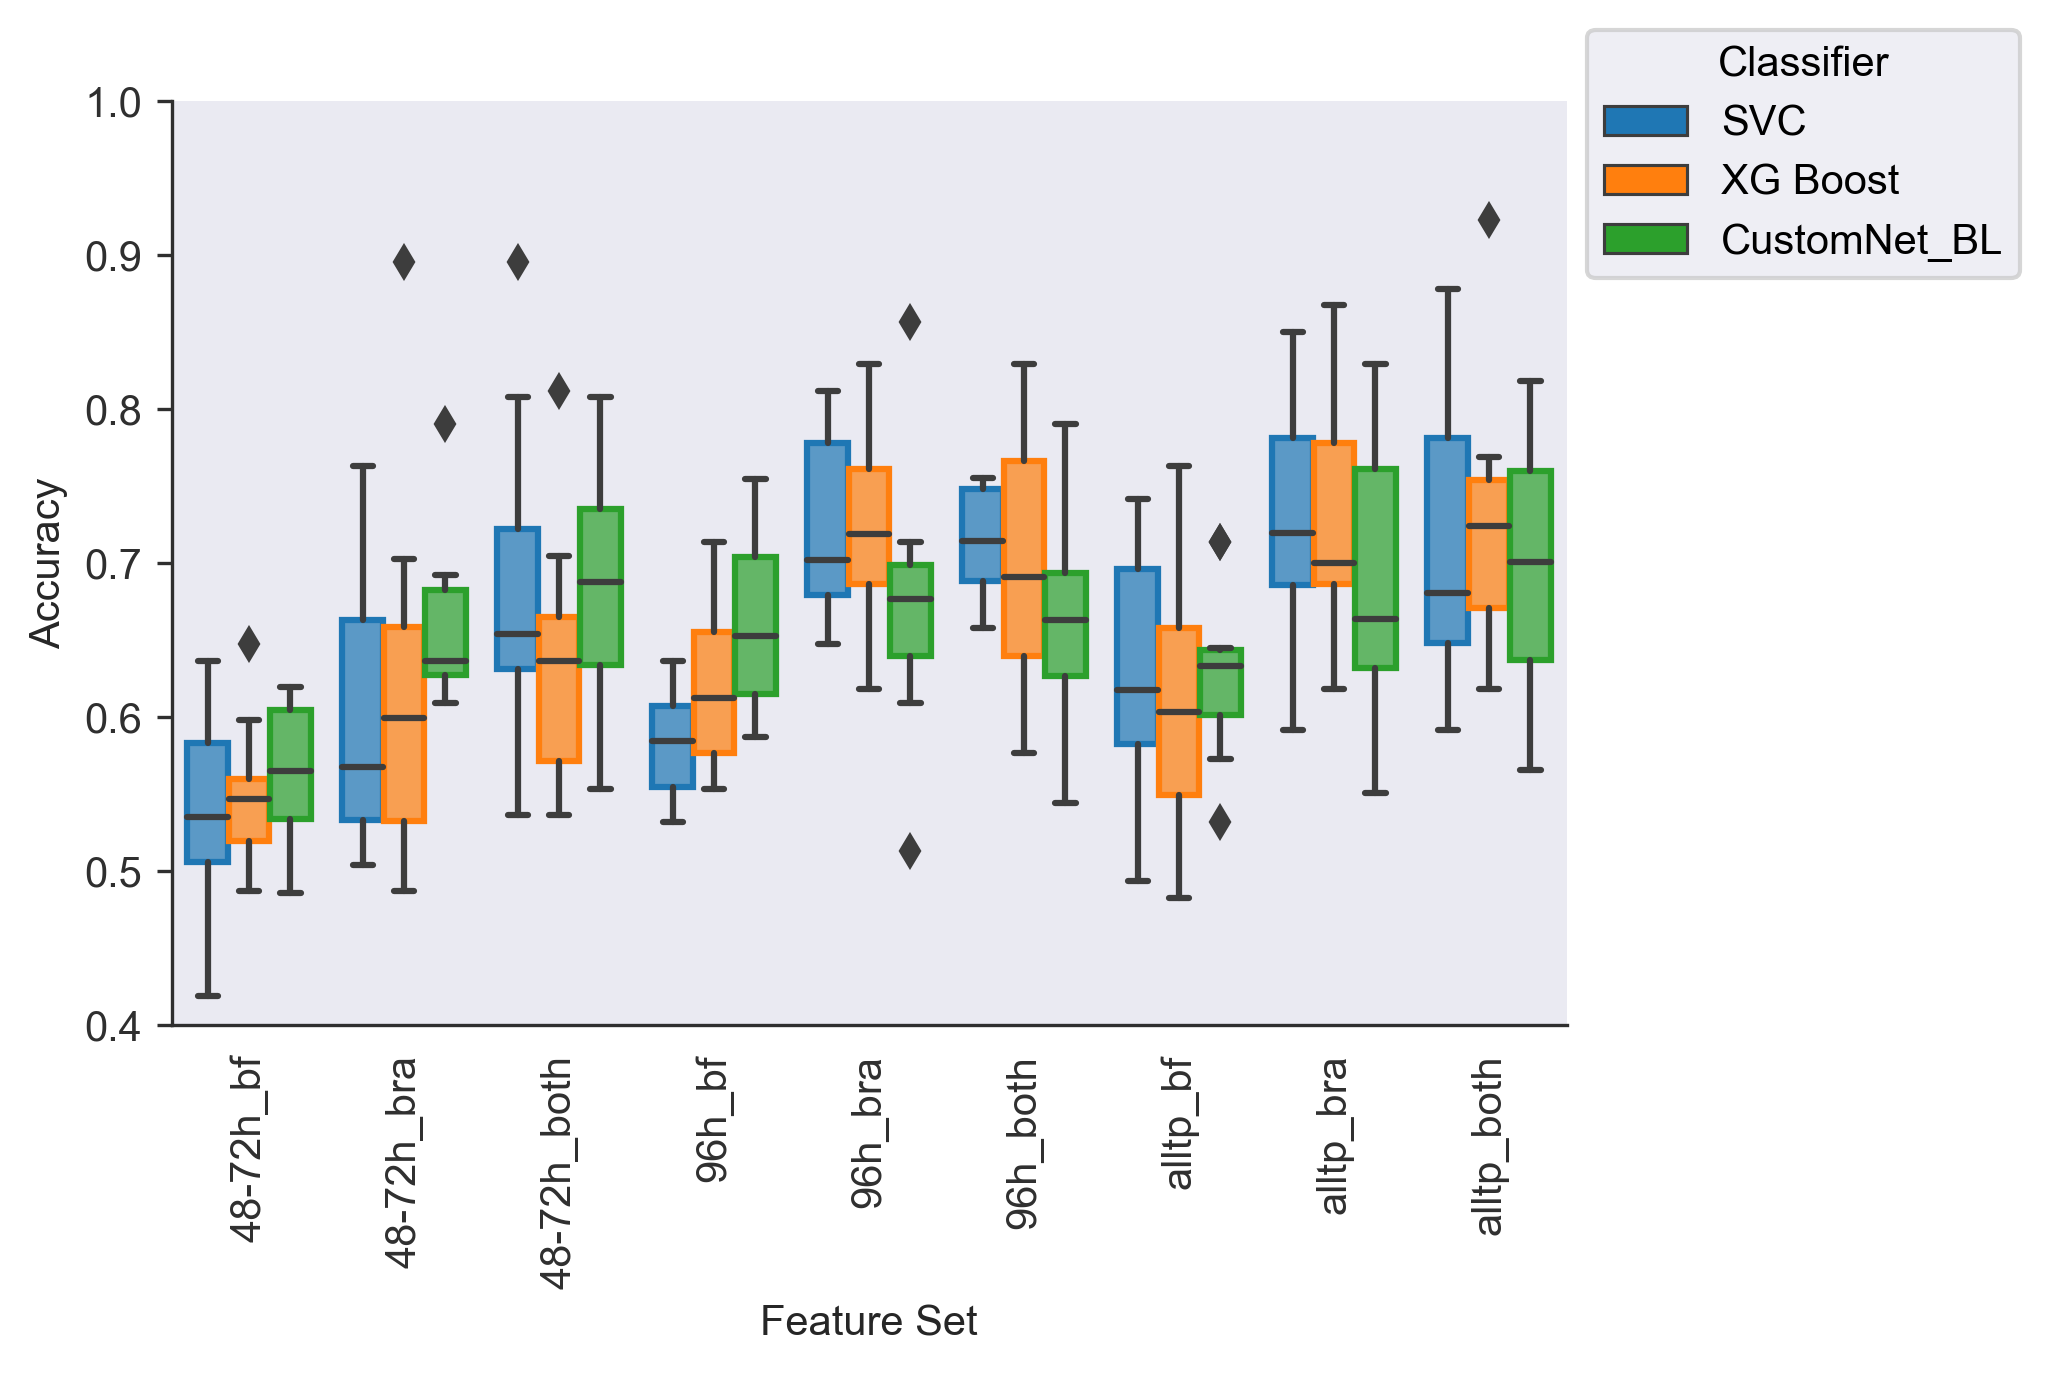

In [15]:
import matplotlib as mpl

models_for_paper = [
    'SVC', 
    'XG Boost',
    'CustomNet_BL',
]

mpl.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(1,1,figsize=(6,4))
hue_order=models_for_paper
order = all_morph_data["Feature Set"].unique()

sns.boxplot(
    all_morph_data[[model in models_for_paper for model in all_morph_data["Classifier"]]],
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=order,
    hue_order=hue_order, 
    ax = ax, dodge=True,
    saturation=1,
    palette="tab10"
) #**{"alpha":0.6,"linewidth":1}
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.4,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/morph classification comparison paper models all feature sets.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

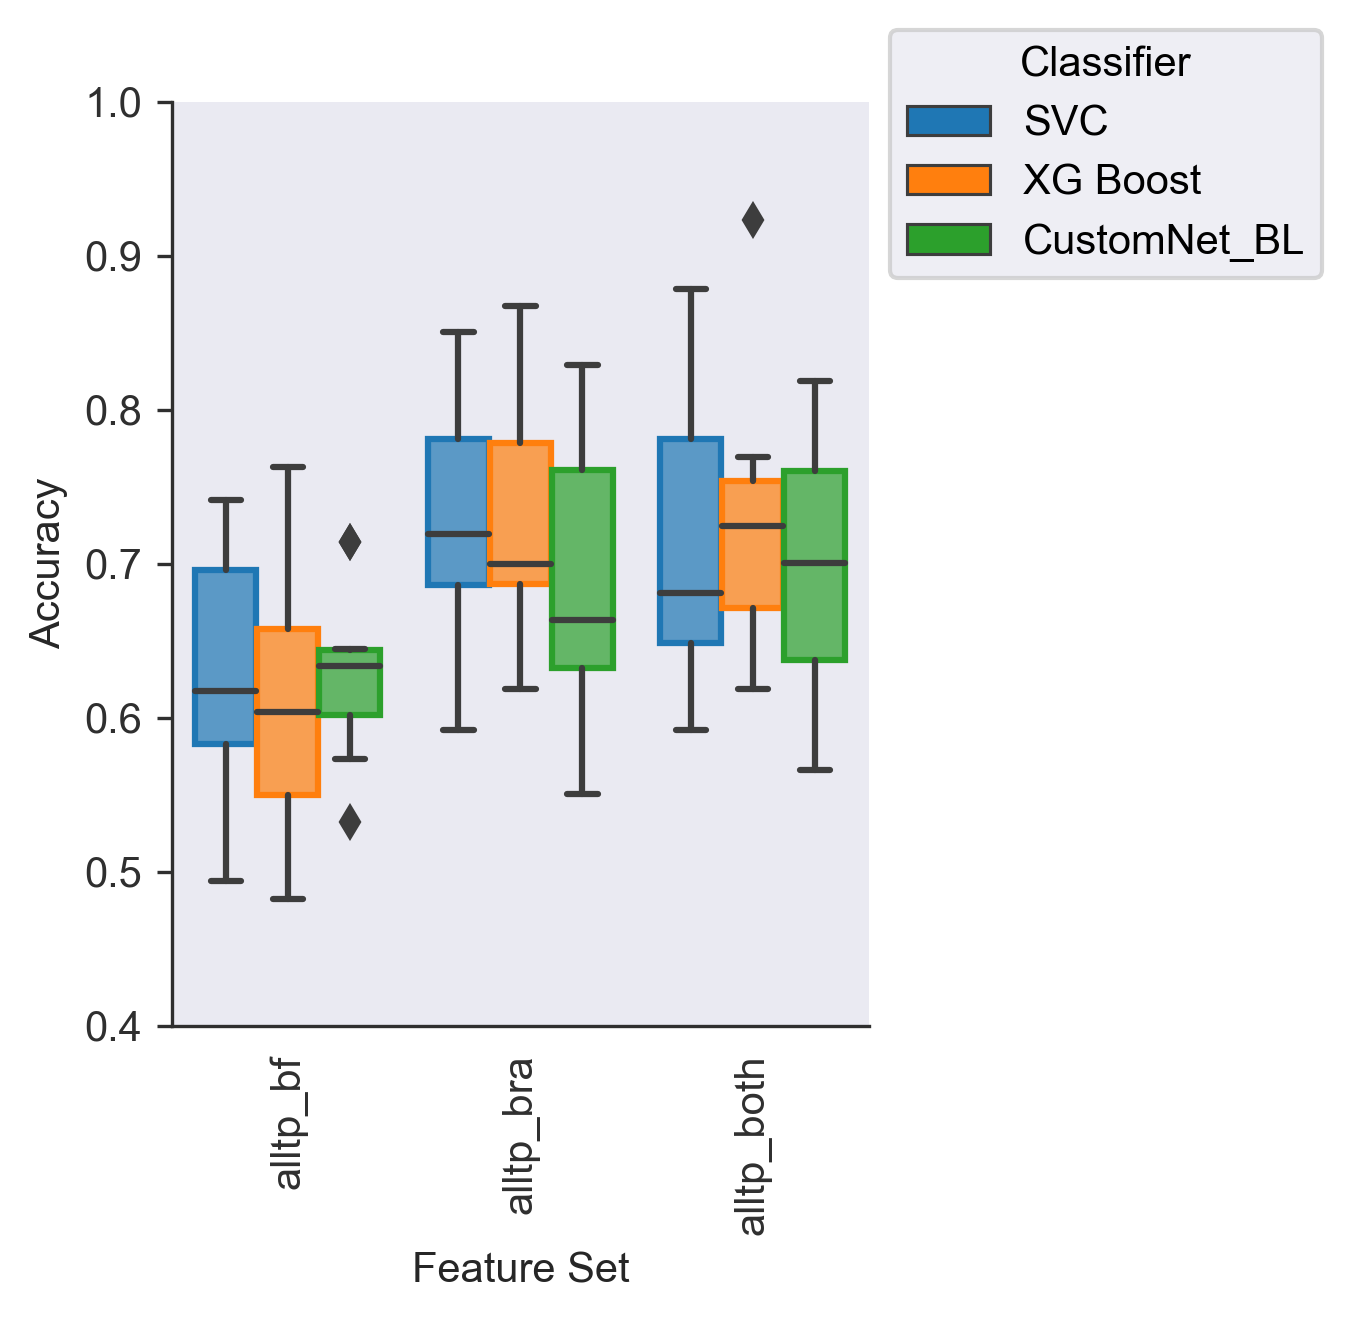

In [16]:
fig, ax = plt.subplots(1,1,figsize=(3,4))
hue_order=all_morph_data["Classifier"].unique()
order = all_morph_data["Feature Set"].unique()

sns.boxplot(
    all_morph_data[
        [feature in features_channels and model in models_for_paper for feature,model in all_morph_data[["Feature Set","Classifier"]].to_numpy()]
    ],
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=features_channels,
    hue_order=models_for_paper, 
    ax = ax, dodge=True,
    saturation=1,
    palette = "tab10"
)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.4,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/morph classification comparison paper models channels.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, DejaVu Sans, Liberation Sans, Bitstream Vera Sans, san

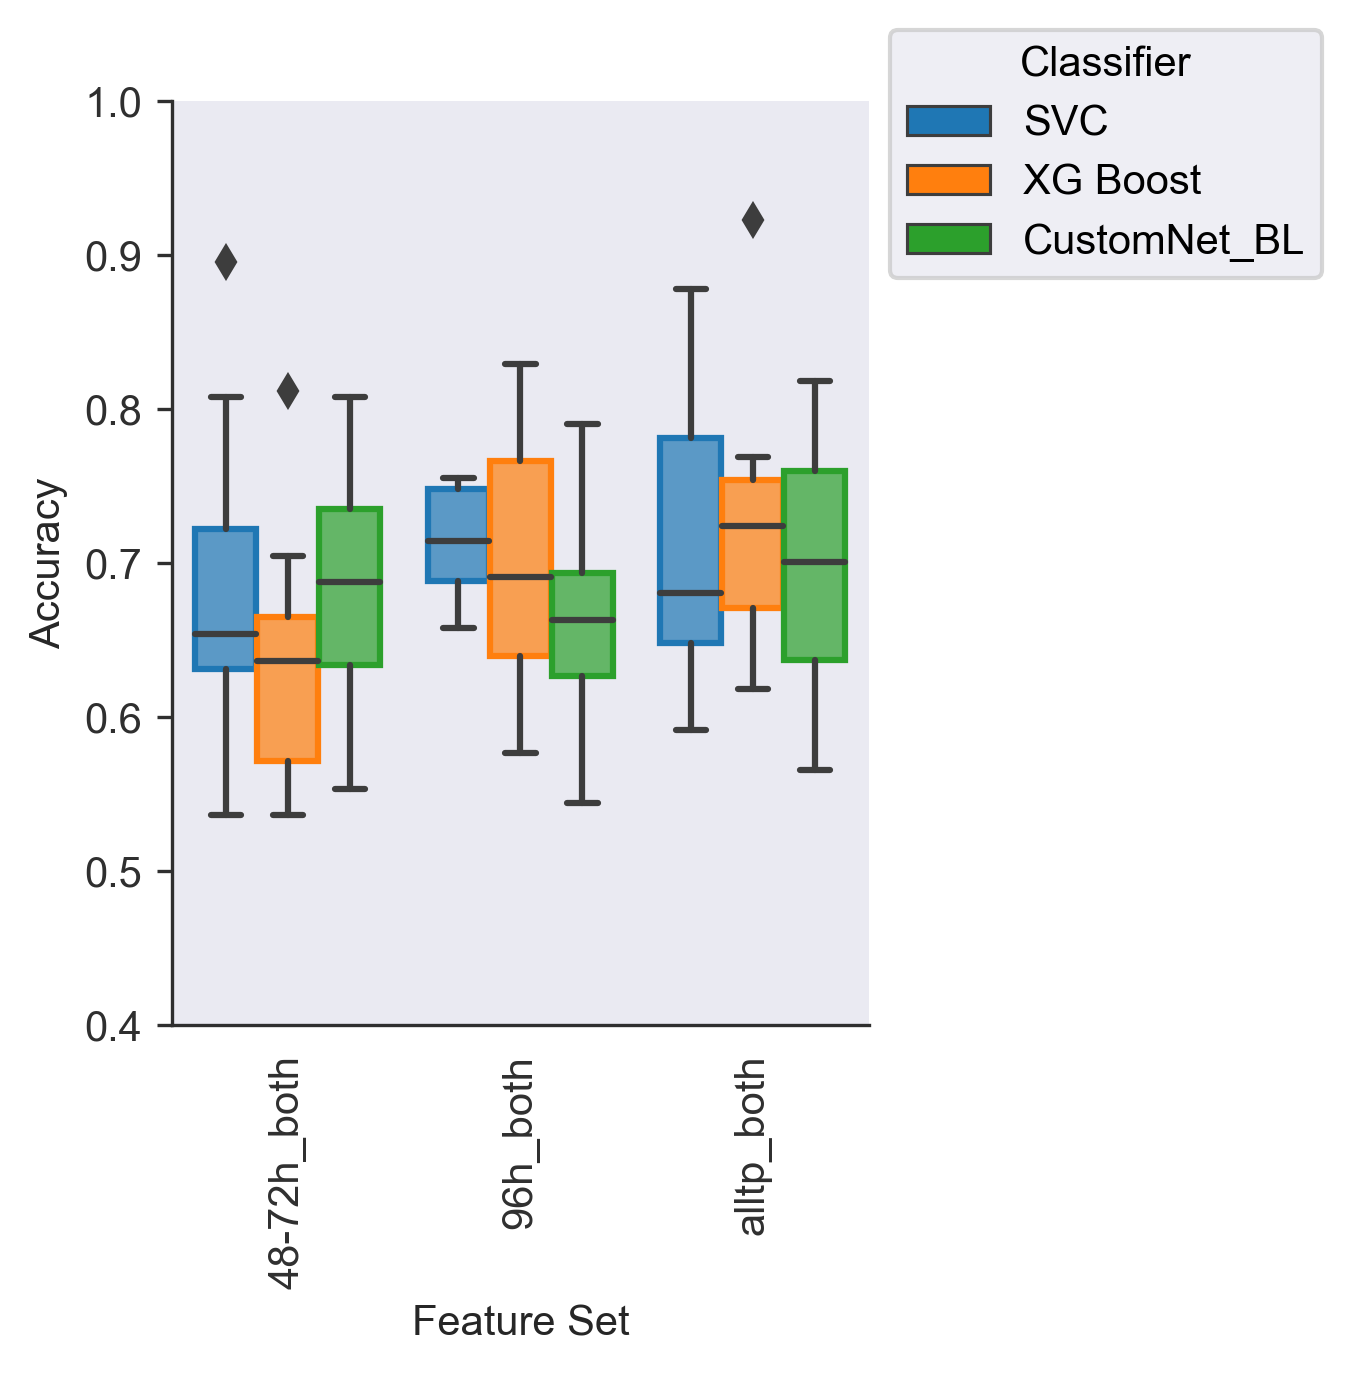

In [17]:
fig, ax = plt.subplots(1,1,figsize=(3,4))
hue_order=all_morph_data["Classifier"].unique()
order = all_morph_data["Feature Set"].unique()

sns.boxplot(
    all_morph_data[
        [feature in features_timepoints and model in models_for_paper for feature,model in all_morph_data[["Feature Set","Classifier"]].to_numpy()]
    ],
    y="Accuracy",
    x="Feature Set",
    hue="Classifier",
    order=features_timepoints,
    hue_order=models_for_paper, 
    ax = ax, dodge=True,
    saturation=1,
    palette="tab10"
)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))
   # patch.set_edgecolor([1,1,1,1])
    patch.set_edgecolor(tuple(list(clr[:-1])+[1]))

    
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.1))
ax.set_ylim([0.4,1])
plt.xticks(rotation=90)
plt.savefig(out_revisions + f"/morph classification comparison paper models timepoints.pdf", format = "pdf", dpi = 300, bbox_inches="tight")
plt.show()